# Контрольная работа 1. Омар Золоев БИВТ-21-17 Язык: Python, все данные, графики, результаты в этом ноутбуке

In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

import sys
sys.setrecursionlimit(10**6)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style('white')
sns.despine()

<Figure size 800x600 with 0 Axes>

## Сортировка пузырьком

In [2]:
def bubble_sort(array):
    size = len(array)
    for i in range(size - 1):
        for j in range(size - i - 1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    return array

## Сортировка выбором

In [3]:
def selection_sort(array):
    for i, e in enumerate(array):
        mn = min(range(i, len(array)), key=array.__getitem__)
        array[i], array[mn] = array[mn], e
    return array

## Сортировка простыми вставками

In [4]:
def insertion_sort(array):
    for i in range(1, len(array)):
        temp = array[i]
        j = i - 1
        while (j >= 0 and temp < array[j]):
            array[j + 1] = array[j]
            j = j - 1
        array[j + 1] = temp
    return array

## Сортировка подсчетом (устойчивая)

In [5]:
def counting_sort(inputArray):
    maxElement= max(inputArray)

    countArrayLength = maxElement+1

    countArray = [0] * countArrayLength

    for el in inputArray: 
        countArray[el] += 1

    for i in range(1, countArrayLength):
        countArray[i] += countArray[i-1] 

    outputArray = [0] * len(inputArray)
    i = len(inputArray) - 1
    while i >= 0:
        currentEl = inputArray[i]
        countArray[currentEl] -= 1
        newPosition = countArray[currentEl]
        outputArray[newPosition] = currentEl
        i -= 1

    return outputArray

## Цифровая сортировка

In [6]:
import random
from functools import reduce
def len_number(num):
    c = 0
    while num:
        num //= 10
        c += 1
    return c

def radix_sort(array):
    sorted_array = array.copy()
    shift = 1
    for x in range(len_number(max(sorted_array))):
        result = [[] for _ in range(10)]
        numbers = [x for x in range(10)]
        for e, num in enumerate(numbers):
            for arr in sorted_array:
                if num == arr % (shift * 10) // shift:
                    result[e].append(arr)
        sorted_array = reduce(lambda x,y: x+y, result)
        shift = shift * 10

    return sorted_array

## Сортировка слиянием

In [7]:
def merge_sort(array):
    sorted_arr = array.copy()
    if len(sorted_arr) > 1: 
        mid = len(sorted_arr)//2
        left = sorted_arr[:mid] 
        right = sorted_arr[mid:]
        merge_sort(left) 
        merge_sort(right) 
        i = j = k = 0
        while i < len(left) and j < len(right): 
            if left[i] < right[j]: 
                sorted_arr[k] = left[i] 
                i+=1
            else: 
                sorted_arr[k] = right[j] 
                j+=1
            k+=1
        while i < len(left): 
            sorted_arr[k] = left[i] 
            i+=1
            k+=1
        while j < len(right): 
            sorted_arr[k] = right[j] 
            j+=1
            k+=1
    return sorted_arr

## Быстрая сортировка

In [8]:
def quick_sort(array, start, end):

    if end - start > 1:
        p = partition(array, start, end)
        quick_sort(array, start, p)
        quick_sort(array, p + 1, end)
    return array
 
def partition(sorted_arr, start, end):
    pivot = sorted_arr[start]
    i = start + 1
    j = end - 1
 
    while True:
        while (i <= j and sorted_arr[i] <= pivot):
            i = i + 1
        while (i <= j and sorted_arr[j] >= pivot):
            j = j - 1
 
        if i <= j:
            sorted_arr[i], sorted_arr[j] = sorted_arr[j], sorted_arr[i]
        else:
            sorted_arr[start], sorted_arr[j] = sorted_arr[j], sorted_arr[start]
            return j

## Пирамидальная сортировка

In [9]:
def heap_sort(array):
    build_max_heap(array)
    for i in range(len(array) - 1, 0, -1):
        array[0], array[i] = array[i], array[0]
        max_heapify(array, index=0, size=i)

    return array
 
def parent(i):
    return (i - 1)//2
 
def left(i):
    return 2*i + 1
 
def right(i):
    return 2*i + 2
 
def build_max_heap(sorted_arr):
    length = len(sorted_arr)
    start = parent(length - 1)
    while start >= 0:
        max_heapify(sorted_arr, index=start, size=length)
        start = start - 1
 
def max_heapify(sorted_arr, index, size):
    l = left(index)
    r = right(index)
    if (l < size and sorted_arr[l] > sorted_arr[index]):
        largest = l
    else:
        largest = index
    if (r < size and sorted_arr[r] > sorted_arr[largest]):
        largest = r
    if (largest != index):
        sorted_arr[largest], sorted_arr[index] = sorted_arr[index], sorted_arr[largest]
        max_heapify(sorted_arr, largest, size)

## Массивы на которых будут проводится измерения

In [10]:
first_array_small = np.random.randint(6, size=(300))
second_array_small = np.random.randint(4001, size=(300))
first_array_big = np.random.randint(6, size=(4100))
second_array_big = np.random.randint(4001, size=(4100))

third_array_small = np.arange(0, 300, 1, dtype=int)
for i in range(50, len(third_array_small) - 50, 50):
    third_array_small[i], third_array_small[i - 50] = third_array_small[i - 50], third_array_small[i]
    third_array_small[i + 1], third_array_small[i - 49] = third_array_small[i - 49], third_array_small[i + 1]
third_array_big = np.arange(0, 4100, 1, dtype=int)
for i in range(100, len(third_array_small) - 100, 100):
    third_array_big[i], third_array_big[i - 100] = third_array_big[i - 100], third_array_big[i]
    third_array_big[i + 1], third_array_big[i - 99] = third_array_big[i - 99], third_array_big[i + 1]

fourth_array_small = np.arange(300, 0, -1, dtype=int)
fourth_array_big = np.arange(4100, 0, -1, dtype=int)

## Датасеты для сохранения результатов

In [11]:
data_f = pd.DataFrame()
data_s = pd.DataFrame()

size_arr_1 = []
for i in range(0, 350, 50):
    size_arr_1.append(i)
data_f['Размер массива'] = size_arr_1

size_arr_2 = []
for i in range(0, 4200, 100):
    size_arr_2.append(i)
data_s['Размер массива'] = size_arr_2

## Все измерения будут сохранятся в массивы с названием: Сортировка_РазмерМассива_ЧислаМассива

In [12]:
bubble_300_0_5 = []
selection_300_0_5 = []
insertion_300_0_5 = []
counting_300_0_5 = []
radix_300_0_5 = []
merge_300_0_5 = []
quick_300_0_5 = []
heap_300_0_5 = []

В каждом из следующих блоков будет такой цикл, в нём происходят замерения на данных и массивах, в конце закидываю всё в датасет. Не знаю почему не сделал код функционально ориентированным, заранее прошу за это прощение.

In [13]:
for i in range(0, 350, 50):
    start = time.time()
    b = bubble_sort(first_array_small[0:i+50].copy())
    end = time.time()
    bubble_300_0_5.append((end - start) * 10**3)

    start = time.time()
    selection_sort(first_array_small[0:i+50].copy())
    end = time.time()
    selection_300_0_5 .append((end - start) * 10**3)

    start = time.time()
    insertion_sort(first_array_small[0:i+50].copy())
    end = time.time()
    insertion_300_0_5 .append((end - start) * 10**3)

    start = time.time()
    counting_sort(first_array_small[0:i+50].copy())
    end = time.time()
    counting_300_0_5 .append((end - start) * 10**3)

    start = time.time()
    radix_sort(first_array_small[0:i+50].copy())
    end = time.time()
    radix_300_0_5.append((end - start) * 10**3)

    start = time.time()
    merge_sort(first_array_small[0:i+50].copy())
    end = time.time()
    merge_300_0_5.append((end - start) * 10**3)

    start = time.time()
    quick_sort(first_array_small[0:i+50].copy(), 0, len(first_array_small[0:i+50].copy()))
    end = time.time()
    quick_300_0_5.append((end - start) * 10**3)

    start = time.time()
    heap_sort(first_array_small[0:i+50].copy())
    end = time.time()
    heap_300_0_5.append((end - start) * 10**3)

In [14]:
data_f['bubble_300_0_5'] = bubble_300_0_5
data_f['selection_300_0_5'] = selection_300_0_5
data_f['insertion_300_0_5'] = insertion_300_0_5
data_f['counting_300_0_5'] = counting_300_0_5
data_f['radix_300_0_5'] = radix_300_0_5
data_f['merge_300_0_5'] = merge_300_0_5
data_f['quick_300_0_5'] = quick_300_0_5
data_f['heap_300_0_5'] = heap_300_0_5

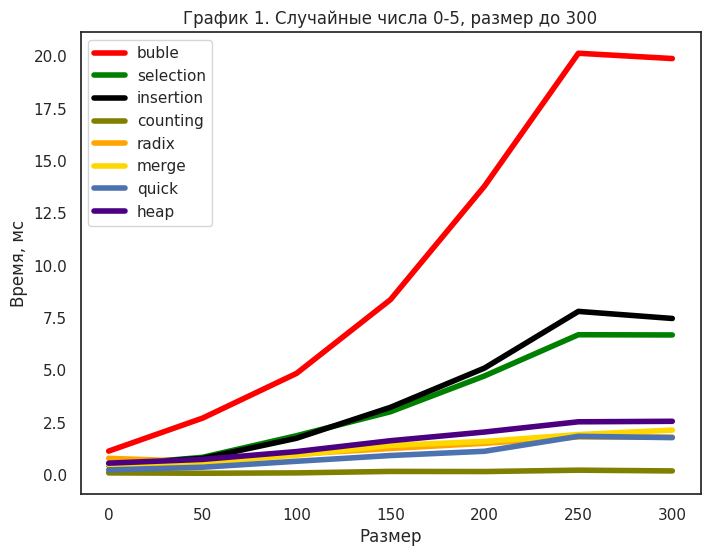

In [15]:
plt.plot(size_arr_1, bubble_300_0_5 , c='red', label='buble', lw = 4)
plt.plot(size_arr_1, selection_300_0_5 , c='green', label='selection', lw = 4)
plt.plot(size_arr_1, insertion_300_0_5 , c='black', label='insertion', lw = 4)
plt.plot(size_arr_1, counting_300_0_5 , c='olive', label='counting', lw = 4)
plt.plot(size_arr_1, radix_300_0_5 , c='orange', label='radix', lw = 4)
plt.plot(size_arr_1, merge_300_0_5 , c='gold', label='merge', lw = 4)
plt.plot(size_arr_1, quick_300_0_5 , c='b', label='quick', lw = 4)
plt.plot(size_arr_1, heap_300_0_5 , c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 1. Случайные числа 0-5, размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

В первом графике с отрывом видно преимущество сортировки подсчётом, это не удивительно ведь она будет работать за линию когда k (диапазон чисел которые могут встречаться в массиве) мало по сравнению с n. Не удивительно что после неё по скорости идёт цифровая так как в данных только цифры от 0 до 5. Сложность их сводится к линейной. Квадратичные сортировки как и должно быть - на таких данных работают медленно. Остальные сортировки (рекурсивные) справляются тоже примерно за линию, ведь данных не очень много

In [16]:
bubble_300_0_4000 = []
selection_300_0_4000  = []
insertion_300_0_4000  = []
counting_300_0_4000  = []
radix_300_0_4000  = []
merge_300_0_4000  = []
quick_300_0_4000  = []
heap_300_0_4000  = []

In [17]:
for i in range(0, 350, 50):
    start = time.time()
    bubble_sort(second_array_small[0:i+50].copy())
    end = time.time()
    bubble_300_0_4000.append((end - start) * 10**3)

    start = time.time()
    selection_sort(second_array_small[0:i+50].copy())
    end = time.time()
    selection_300_0_4000.append((end - start) * 10**3)

    start = time.time()
    insertion_sort(second_array_small[0:i+50].copy())
    end = time.time()
    insertion_300_0_4000.append((end - start) * 10**3)

    start = time.time()
    counting_sort(second_array_small[0:i+50].copy())    
    end = time.time()
    counting_300_0_4000.append((end - start) * 10**3)

    start = time.time()
    radix_sort(second_array_small[0:i+50].copy())
    end = time.time()
    radix_300_0_4000.append((end - start) * 10**3)

    start = time.time()
    merge_sort(second_array_small[0:i+50].copy())
    end = time.time()
    merge_300_0_4000.append((end - start) * 10**3)

    start = time.time()
    quick_sort(second_array_small[0:i+50].copy(), 0, len(second_array_small[0:i+50].copy()))
    end = time.time()
    quick_300_0_4000.append((end - start) * 10**3)

    start = time.time()
    heap_sort(second_array_small[0:i+50].copy())
    end = time.time()
    heap_300_0_4000.append((end - start) * 10**3)

In [18]:
data_f['bubble_300_0_4000'] = bubble_300_0_4000
data_f['selection_300_0_4000'] = selection_300_0_4000
data_f['insertion_300_0_4000'] = insertion_300_0_4000
data_f['counting_300_0_4000'] = counting_300_0_4000
data_f['radix_300_0_4000'] = radix_300_0_4000
data_f['merge_300_0_4000'] = merge_300_0_4000
data_f['quick_300_0_4000'] = quick_300_0_4000
data_f['heap_300_0_4000'] = heap_300_0_4000

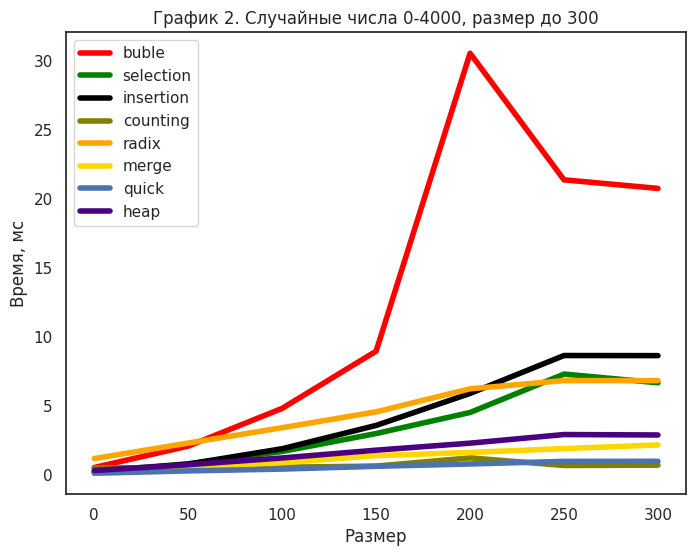

In [19]:
plt.plot(size_arr_1, bubble_300_0_4000, c='red', label='buble', lw = 4)
plt.plot(size_arr_1, selection_300_0_4000, c='green', label='selection', lw = 4)
plt.plot(size_arr_1, insertion_300_0_4000, c='black', label='insertion', lw = 4)
plt.plot(size_arr_1, counting_300_0_4000, c='olive', label='counting', lw = 4)
plt.plot(size_arr_1, radix_300_0_4000, c='orange', label='radix', lw = 4)
plt.plot(size_arr_1, merge_300_0_4000 , c='gold', label='merge', lw = 4)
plt.plot(size_arr_1, quick_300_0_4000, c='b', label='quick', lw = 4)
plt.plot(size_arr_1, heap_300_0_4000, c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 2. Случайные числа 0-4000, размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

На графике 2 видно что quick sort и counting sort имею почти одиннаковые значения. Связано это с тем что при большом количестве разных числа (в данном случае до 4к) вероятность того что qsort возьмёт плохой опорный элемент - очень мала. На 50 элементах cnt sort показывает небольшой скачёк, скорее всего это связано с тем что в этом диапазоне было большое k по сравнению с n. Возрасло время выполнения цифровой сортироки - так как уже у чисел разрыдов 4 и встретиться может любая цифра.

In [20]:
bubble_4100_0_5 = []
selection_4100_0_5  = []
insertion_4100_0_5  = []
counting_4100_0_5  = []
radix_4100_0_5  = []
merge_4100_0_5  = []
quick_4100_0_5  = []
heap_4100_0_5  = []

In [21]:
for i in range(0, 4200, 100):
    start = time.time()
    bubble_sort(first_array_big[0:i+100].copy())
    end = time.time()
    bubble_4100_0_5.append((end - start) * 10**3)

    start = time.time()
    selection_sort(first_array_big[0:i+100].copy())
    end = time.time()
    selection_4100_0_5.append((end - start) * 10**3)

    start = time.time()
    insertion_sort(first_array_big[0:i+100].copy())
    end = time.time()
    insertion_4100_0_5.append((end - start) * 10**3)

    start = time.time()
    counting_sort(first_array_big[0:i+100].copy())
    end = time.time()
    counting_4100_0_5.append((end - start) * 10**3)

    start = time.time()
    radix_sort(first_array_big[0:i+100].copy())
    end = time.time()
    radix_4100_0_5.append((end - start) * 10**3)

    start = time.time()
    merge_sort(first_array_big[0:i+100].copy())
    end = time.time()
    merge_4100_0_5.append((end - start) * 10**3)

    start = time.time()
    quick_sort(first_array_big[0:i+100].copy(), 0, len(first_array_big[0:i+100].copy()))
    end = time.time()
    quick_4100_0_5.append((end - start) * 10**3)

    start = time.time()
    heap_sort(first_array_big[0:i+100].copy())
    end = time.time()
    heap_4100_0_5.append((end - start) * 10**3)

In [22]:
data_s['bubble_4100_0_5'] = bubble_4100_0_5
data_s['selection_4100_0_5'] = selection_4100_0_5
data_s['insertion_4100_0_5'] = insertion_4100_0_5
data_s['counting_4100_0_5'] = counting_4100_0_5
data_s['radix_4100_0_5'] = radix_4100_0_5
data_s['merge_4100_0_5'] = merge_4100_0_5
data_s['quick_4100_0_5'] = quick_4100_0_5
data_s['heap_4100_0_5'] = heap_4100_0_5

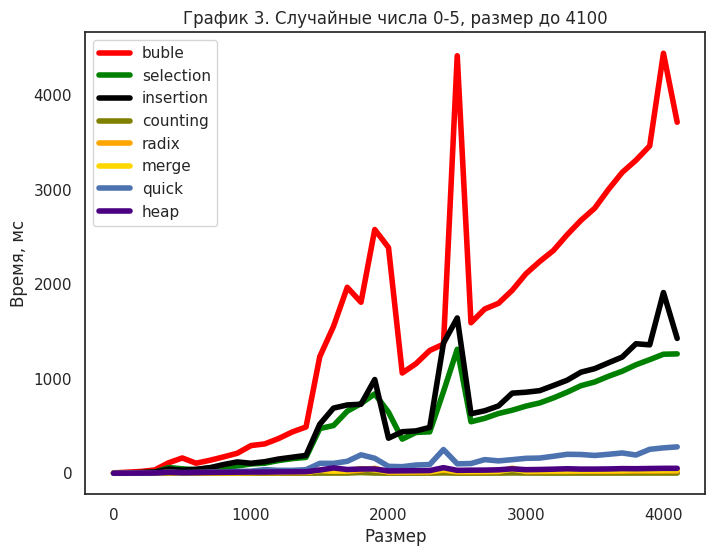

In [23]:
plt.plot(size_arr_2, bubble_4100_0_5, c='red', label='buble', lw = 4)
plt.plot(size_arr_2, selection_4100_0_5, c='green', label='selection', lw = 4)
plt.plot(size_arr_2, insertion_4100_0_5, c='black', label='insertion', lw = 4)
plt.plot(size_arr_2, counting_4100_0_5, c='olive', label='counting', lw = 4)
plt.plot(size_arr_2, radix_4100_0_5, c='orange', label='radix', lw = 4)
plt.plot(size_arr_2, merge_4100_0_5, c='gold', label='merge', lw = 4)
plt.plot(size_arr_2, quick_4100_0_5, c='b', label='quick', lw = 4)
plt.plot(size_arr_2, heap_4100_0_5, c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 3. Случайные числа 0-5, размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

qSort на графике 3 стала работать хуже других рекурсивных, так как вероятность выбрать плохой опорный (к примеру 0 или 5) - возрасла в разы. Сортировки подсетом и цифровая работают быстро по выше сказынным причинам, а вот heap сорт - улучшил свои показатели, так как опять числа от 0 до 5 и кол-во цифр которые могут бысть максимальным элементом - уменьшилось в также в разы.

In [24]:
bubble_4100_0_4000= []
selection_4100_0_4000 = []
insertion_4100_0_4000 = []
counting_4100_0_4000 = []
radix_4100_0_4000 = []
merge_4100_0_4000 = []
quick_4100_0_4000 = []
heap_4100_0_4000 = []

In [25]:
for i in range(0, 4200, 100):
    start = time.time()
    bubble_sort(second_array_big[0:i+100].copy())
    end = time.time()
    bubble_4100_0_4000.append((end - start) * 10**3)

    start = time.time()
    selection_sort(second_array_big[0:i+100].copy())
    end = time.time()
    selection_4100_0_4000.append((end - start) * 10**3)

    start = time.time()
    insertion_sort(second_array_big[0:i+100].copy())
    end = time.time()
    insertion_4100_0_4000.append((end - start) * 10**3)

    start = time.time()
    counting_sort(second_array_big[0:i+100].copy())
    end = time.time()
    counting_4100_0_4000.append((end - start) * 10**3)

    start = time.time()
    radix_sort(second_array_big[0:i+100].copy())
    end = time.time()
    radix_4100_0_4000.append((end - start) * 10**3)

    start = time.time()
    merge_sort(second_array_big[0:i+100].copy())
    end = time.time()
    merge_4100_0_4000.append((end - start) * 10**3)

    start = time.time()
    quick_sort(second_array_big[0:i+100].copy(), 0, len(second_array_big[0:i+100].copy()))
    end = time.time()
    quick_4100_0_4000.append((end - start) * 10**3)

    start = time.time()
    heap_sort(second_array_big[0:i+100].copy())
    end = time.time()
    heap_4100_0_4000.append((end - start) * 10**3)

In [26]:
data_s['bubble_4100_0_4000'] = bubble_4100_0_4000
data_s['selection_4100_0_4000'] = selection_4100_0_4000
data_s['insertion_4100_0_4000'] = insertion_4100_0_4000
data_s['counting_4100_0_4000'] = counting_4100_0_4000
data_s['radix_4100_0_4000'] = radix_4100_0_4000
data_s['merge_4100_0_4000'] = merge_4100_0_4000
data_s['quick_4100_0_4000'] = quick_4100_0_4000
data_s['heap_4100_0_4000'] = heap_4100_0_4000

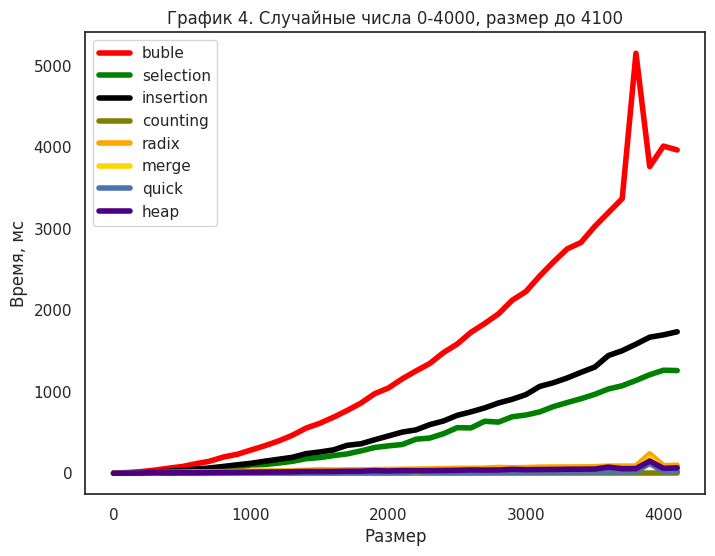

In [27]:
plt.plot(size_arr_2, bubble_4100_0_4000, c='red', label='buble', lw = 4)
plt.plot(size_arr_2, selection_4100_0_4000, c='green', label='selection', lw = 4)
plt.plot(size_arr_2, insertion_4100_0_4000, c='black', label='insertion', lw = 4)
plt.plot(size_arr_2, counting_4100_0_4000, c='olive', label='counting', lw = 4)
plt.plot(size_arr_2, radix_4100_0_4000, c='orange', label='radix', lw = 4)
plt.plot(size_arr_2, merge_4100_0_4000, c='gold', label='merge', lw = 4)
plt.plot(size_arr_2, quick_4100_0_4000, c='b', label='quick', lw = 4)
plt.plot(size_arr_2, heap_4100_0_4000, c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 4. Случайные числа 0-4000, размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Выделяются только квадратичные сортировки по понятным причинам: размер массива и числа в нём уже не самые маленькие. Можно вывести график для них, чтобы посмотреть какая показывает себя лучше:

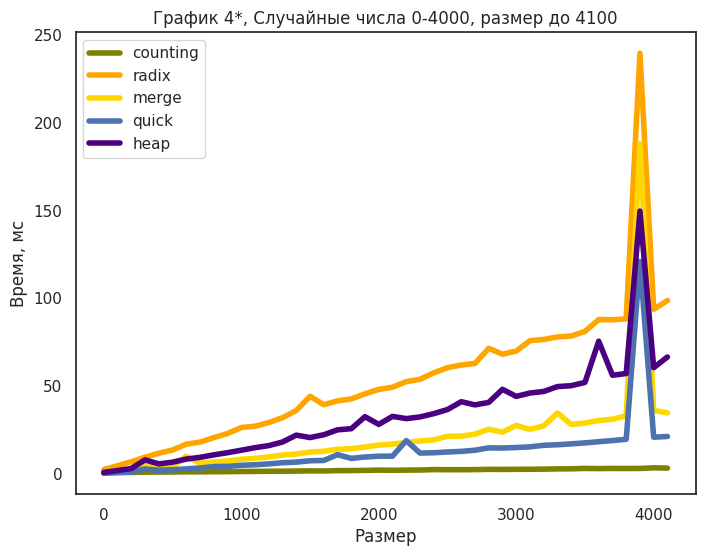

In [28]:
plt.plot(size_arr_2, counting_4100_0_4000, c='olive', label='counting', lw = 4)
plt.plot(size_arr_2, radix_4100_0_4000, c='orange', label='radix', lw = 4)
plt.plot(size_arr_2, merge_4100_0_4000, c='gold', label='merge', lw = 4)
plt.plot(size_arr_2, quick_4100_0_4000, c='b', label='quick', lw = 4)
plt.plot(size_arr_2, heap_4100_0_4000, c='indigo', label='heap', lw = 4)
plt.legend()
plt.title('График 4*, Случайные числа 0-4000, размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Всё довольно очевидно: цифровая хуже всех, так как кол-во разрядов увеличилось и возможны все цифры, qsort почти также быстра как и cnt, но хуже, так как всё таки для cnt sort k и n досточно малы чтобы она работала плохо.

In [29]:
bubble_300_reversed = []
selection_300_reversed = []
insertion_300_reversed = []
counting_300_reversed = []
radix_300_reversed = []
merge_300_reversed = []
quick_300_reversed = []
heap_300_reversed = []

In [30]:
for i in range(0, 350, 50):
    start = time.time()
    bubble_sort(fourth_array_small[0:i+50].copy())
    end = time.time()
    bubble_300_reversed.append((end - start) * 10**3)

    start = time.time()
    selection_sort(fourth_array_small[0:i+50].copy())
    end = time.time()
    selection_300_reversed.append((end - start) * 10**3)

    start = time.time()
    insertion_sort(fourth_array_small[0:i+50].copy())
    end = time.time()
    insertion_300_reversed.append((end - start) * 10**3)

    start = time.time()
    b = counting_sort(fourth_array_small[0:i+50].copy())    
    end = time.time()
    counting_300_reversed.append((end - start) * 10**3)

    start = time.time()
    radix_sort(fourth_array_small[0:i+50].copy())
    end = time.time()
    radix_300_reversed.append((end - start) * 10**3)

    start = time.time()
    merge_sort(fourth_array_small[0:i+50].copy())
    end = time.time()
    merge_300_reversed.append((end - start) * 10**3)

    start = time.time()
    quick_sort(fourth_array_small[0:i+50].copy(), 0, len(fourth_array_small[0:i+50].copy()))
    end = time.time()
    quick_300_reversed.append((end - start) * 10**3)

    start = time.time()
    heap_sort(fourth_array_small[0:i+50].copy())
    end = time.time()
    heap_300_reversed.append((end - start) * 10**3)

In [31]:
data_f['bubble_300_reversed'] = bubble_300_reversed
data_f['selection_300_reversed'] = selection_300_reversed
data_f['insertion_300_reversed'] = insertion_300_reversed
data_f['counting_300_reversed'] = counting_300_reversed
data_f['radix_300_reversed'] = radix_300_reversed
data_f['merge_300_reversed'] = merge_300_reversed
data_f['quick_300_reversed'] = quick_300_reversed
data_f['quick_300_reversed'] = quick_300_reversed

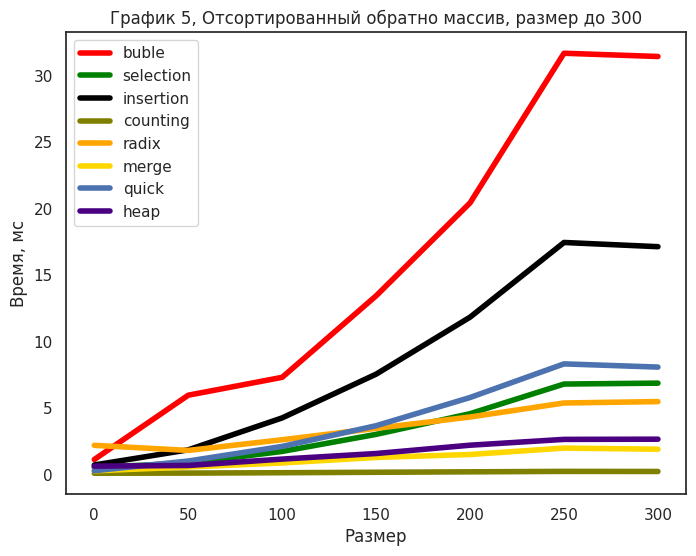

In [33]:
plt.plot(size_arr_1, bubble_300_reversed, c='red', label='buble', lw = 4)
plt.plot(size_arr_1, selection_300_reversed, c='green', label='selection', lw = 4)
plt.plot(size_arr_1, insertion_300_reversed, c='black', label='insertion', lw = 4)
plt.plot(size_arr_1, counting_300_reversed, c='olive', label='counting', lw = 4)
plt.plot(size_arr_1, radix_300_reversed, c='orange', label='radix', lw = 4)
plt.plot(size_arr_1, merge_300_reversed, c='gold', label='merge', lw = 4)
plt.plot(size_arr_1, quick_300_reversed, c='b', label='quick', lw = 4)
plt.plot(size_arr_1, heap_300_reversed, c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 5, Отсортированный обратно массив, размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Понятно ухудшение скорости у quick sort -> первый опорный, всегда самый большой элемент -> задаёт самое худшее разбиение для массива. Selection sort будет работать за квадрат но всегда по одинаковой схеме: доходить до ласт элемента - i и перекидывать его в начало.

In [34]:
bubble_4100_reversed = []
selection_4100_reversed = []
insertion_4100_reversed = []
counting_4100_reversed = []
radix_4100_reversed = []
merge_4100_reversed = []
quick_4100_reversed = []
heap_4100_reversed = []

In [35]:
for i in range(0, 4200, 100):
    start = time.time()
    bubble_sort(fourth_array_big[0:i+100].copy())
    end = time.time()
    bubble_4100_reversed.append((end - start) * 10**3)

    start = time.time()
    selection_sort(fourth_array_big[0:i+100].copy())
    end = time.time()
    selection_4100_reversed.append((end - start) * 10**3)

    start = time.time()
    b = insertion_sort(fourth_array_big[0:i+100].copy())
    end = time.time()
    insertion_4100_reversed.append((end - start) * 10**3)

    start = time.time()
    counting_sort(fourth_array_big[0:i+100].copy())
    end = time.time()
    counting_4100_reversed.append((end - start) * 10**3)

    start = time.time()
    radix_sort(fourth_array_big[0:i+100].copy())
    end = time.time()
    radix_4100_reversed.append((end - start) * 10**3)

    start = time.time()
    merge_sort(fourth_array_big[0:i+100].copy())
    end = time.time()
    merge_4100_reversed.append((end - start) * 10**3)

    start = time.time()
    quick_sort(fourth_array_big[0:i+100].copy(), 0, len(fourth_array_big[0:i+100].copy()))
    end = time.time()
    quick_4100_reversed.append((end - start) * 10**3)

    start = time.time()
    heap_sort(fourth_array_big[0:i+100].copy())
    end = time.time()
    heap_4100_reversed.append((end - start) * 10**3)

In [36]:
data_s['bubble_4100_reversed'] = bubble_4100_reversed
data_s['selection_4100_reversed'] = selection_4100_reversed
data_s['insertion_4100_reversed'] = insertion_4100_reversed
data_s['counting_4100_reversed'] = counting_4100_reversed
data_s['radix_4100_reversed'] = radix_4100_reversed
data_s['merge_4100_reversed'] = merge_4100_reversed
data_s['quick_4100_reversed'] = quick_4100_reversed
data_s['quick_4100_reversed'] = quick_4100_reversed

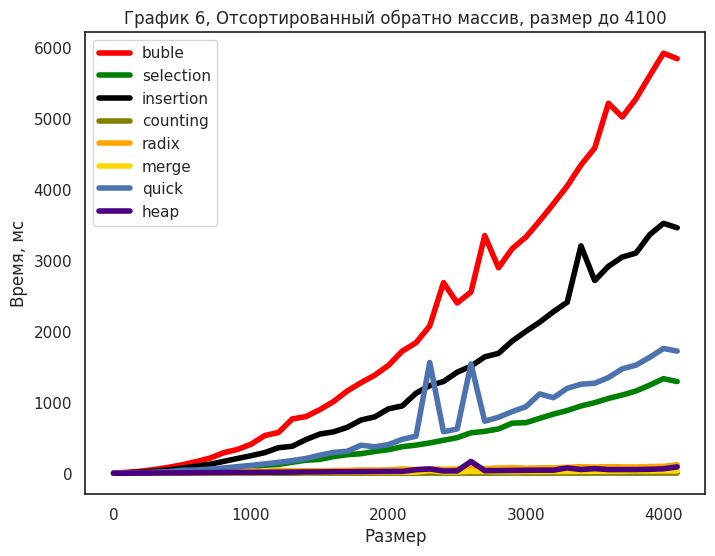

In [37]:
plt.plot(size_arr_2, bubble_4100_reversed, c='red', label='buble', lw = 4)
plt.plot(size_arr_2, selection_4100_reversed, c='green', label='selection', lw = 4)
plt.plot(size_arr_2, insertion_4100_reversed, c='black', label='insertion', lw = 4)
plt.plot(size_arr_2, counting_4100_reversed, c='olive', label='counting', lw = 4)
plt.plot(size_arr_2, radix_4100_reversed, c='orange', label='radix', lw = 4)
plt.plot(size_arr_2, merge_4100_reversed, c='gold', label='merge', lw = 4)
plt.plot(size_arr_2, quick_4100_reversed, c='b', label='quick', lw = 4)
plt.plot(size_arr_2, heap_4100_reversed, c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 6, Отсортированный обратно массив, размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Merge sort, heap sort: работают идеально так как для merge sort: задано идеально разбиение на два массива, а для heap sort максимальный элемент всегда первый. Qsort опять в проигрыше так как ей достаётся самый плохой опорный элемент.

In [38]:
bubble_300_almostSorted = []
selection_300_almostSorted = []
insertion_300_almostSorted = []
counting_300_almostSorted = []
radix_300_almostSorted = []
merge_300_almostSorted = []
quick_300_almostSorted = []
heap_300_almostSorted = []

In [39]:
for i in range(0, 350, 50):
    start = time.time()
    bubble_sort(third_array_small[0:i+50].copy())
    end = time.time()
    bubble_300_almostSorted.append((end - start) * 10**3)

    start = time.time()
    selection_sort(third_array_small[0:i+50].copy())
    end = time.time()
    selection_300_almostSorted.append((end - start) * 10**3)

    start = time.time()
    insertion_sort(third_array_small[0:i+50].copy())
    end = time.time()
    insertion_300_almostSorted.append((end - start) * 10**3)

    start = time.time()
    counting_sort(third_array_small[0:i+50].copy())    
    end = time.time()
    counting_300_almostSorted.append((end - start) * 10**3)

    start = time.time()
    radix_sort(third_array_small[0:i+50].copy())
    end = time.time()
    radix_300_almostSorted.append((end - start) * 10**3)

    start = time.time()
    merge_sort(third_array_small[0:i+50].copy())
    end = time.time()
    merge_300_almostSorted.append((end - start) * 10**3)

    start = time.time()
    quick_sort(third_array_small[0:i+50].copy(), 0, len(third_array_small[0:i+50].copy()))
    end = time.time()
    quick_300_almostSorted.append((end - start) * 10**3)

    start = time.time()
    heap_sort(third_array_small[0:i+50].copy())
    end = time.time()
    heap_300_almostSorted.append((end - start) * 10**3)

In [40]:
data_f['bubble_300_almostSorted'] = bubble_300_almostSorted
data_f['selection_300_almostSorted'] = selection_300_almostSorted
data_f['insertion_300_almostSorted'] = insertion_300_almostSorted
data_f['counting_300_almostSorted'] = counting_300_almostSorted
data_f['radix_300_almostSorted'] = radix_300_almostSorted
data_f['merge_300_almostSorted'] = merge_300_almostSorted
data_f['quick_300_almostSorted'] = quick_300_almostSorted
data_f['heap_300_almostSorted'] = heap_300_almostSorted

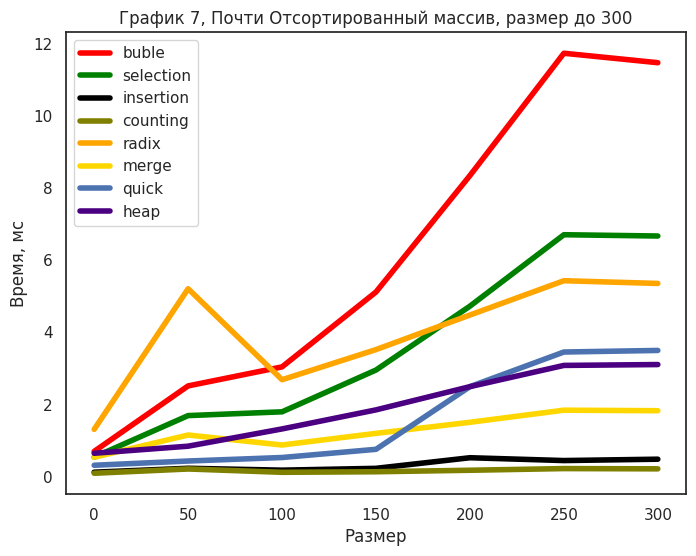

In [41]:
plt.plot(size_arr_1, bubble_300_almostSorted, c='red', label='buble', lw = 4)
plt.plot(size_arr_1, selection_300_almostSorted, c='green', label='selection', lw = 4)
plt.plot(size_arr_1, insertion_300_almostSorted, c='black', label='insertion', lw = 4)
plt.plot(size_arr_1, counting_300_almostSorted, c='olive', label='counting', lw = 4)
plt.plot(size_arr_1, radix_300_almostSorted, c='orange', label='radix', lw = 4)
plt.plot(size_arr_1, merge_300_almostSorted, c='gold', label='merge', lw = 4)
plt.plot(size_arr_1, quick_300_almostSorted, c='b', label='quick', lw = 4)
plt.plot(size_arr_1, heap_300_almostSorted, c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 7, Почти Отсортированный массив, размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

В почти отсортированном массиве хорошо себя показывает insertion sort: по сути ей нужно передвинуть пару элементов на нужную позицию и всё. Остальные сортировки ведут себя по тем же причинам которые описаны выше

In [42]:
bubble_4100_almostSorted = []
selection_4100_almostSorted = []
insertion_4100_almostSorted = []
counting_4100_almostSorted = []
radix_4100_almostSorted = []
merge_4100_almostSorted = []
quick_4100_almostSorted = []
heap_4100_almostSorted = []

In [43]:
for i in range(0, 4200, 100):
    start = time.time()
    bubble_sort(third_array_big[0:i+100].copy())
    end = time.time()
    bubble_4100_almostSorted.append((end - start) * 10**3)

    start = time.time()
    selection_sort(third_array_big[0:i+100].copy())
    end = time.time()
    selection_4100_almostSorted.append((end - start) * 10**3)

    start = time.time()
    b = insertion_sort(third_array_big[0:i+100].copy())
    end = time.time()
    insertion_4100_almostSorted.append((end - start) * 10**3)

    start = time.time()
    counting_sort(third_array_big[0:i+100].copy())
    end = time.time()
    counting_4100_almostSorted.append((end - start) * 10**3)

    start = time.time()
    radix_sort(third_array_big[0:i+100].copy())
    end = time.time()
    radix_4100_almostSorted.append((end - start) * 10**3)

    start = time.time()
    merge_sort(third_array_big[0:i+100].copy())
    end = time.time()
    merge_4100_almostSorted.append((end - start) * 10**3)

    start = time.time()
    quick_sort(third_array_big[0:i+100].copy(), 0, len(third_array_big[0:i+100].copy()))
    end = time.time()
    quick_4100_almostSorted.append((end - start) * 10**3)

    start = time.time()
    heap_sort(third_array_big[0:i+100].copy())
    end = time.time()
    heap_4100_almostSorted.append((end - start) * 10**3)

In [44]:
data_s['bubble_4100_almostSorted'] = bubble_4100_almostSorted
data_s['selection_4100_almostSorted'] = selection_4100_almostSorted
data_s['insertion_4100_almostSorted'] = insertion_4100_almostSorted
data_s['counting_4100_almostSorted'] = counting_4100_almostSorted
data_s['radix_4100_almostSorted'] = radix_4100_almostSorted
data_s['merge_4100_almostSorted'] = merge_4100_almostSorted
data_s['quick_4100_almostSorted'] = quick_4100_almostSorted
data_s['heap_4100_almostSorted'] = heap_4100_almostSorted

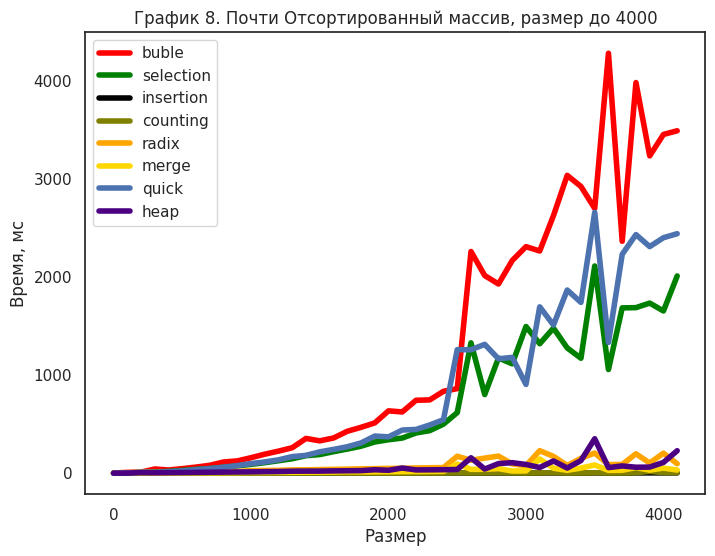

In [45]:
plt.plot(size_arr_2, bubble_4100_almostSorted, c='red', label='buble', lw = 4)
plt.plot(size_arr_2, selection_4100_almostSorted, c='green', label='selection', lw = 4)
plt.plot(size_arr_2, insertion_4100_almostSorted, c='black', label='insertion', lw = 4)
plt.plot(size_arr_2, counting_4100_almostSorted, c='olive', label='counting', lw = 4)
plt.plot(size_arr_2, radix_4100_almostSorted, c='orange', label='radix', lw = 4)
plt.plot(size_arr_2, merge_4100_almostSorted, c='gold', label='merge', lw = 4)
plt.plot(size_arr_2, quick_4100_almostSorted, c='b', label='quick', lw = 4)
plt.plot(size_arr_2, heap_4100_almostSorted, c='indigo', label='heap', lw = 4)

plt.legend()
plt.title('График 8. Почти Отсортированный массив, размер до 4000')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

При росте размера массива qsort стала работать даже хуже чем selection, не удивительно: ассимптотика -> n^2 при худшем разбиении массива. Остальные сортировки ведут себя так же как и при размере 300

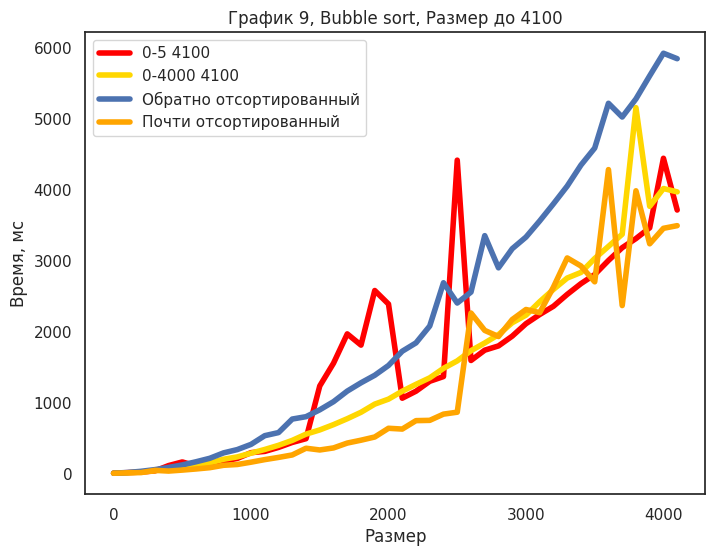

In [46]:
plt.plot(size_arr_2, bubble_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, bubble_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, bubble_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, bubble_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 9, Bubble sort, Размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Bubble sort работает лучше когда в данных есть уже отсортированные части. Что показывает оранжевый график. Худший случай - обратно отсортированный массив

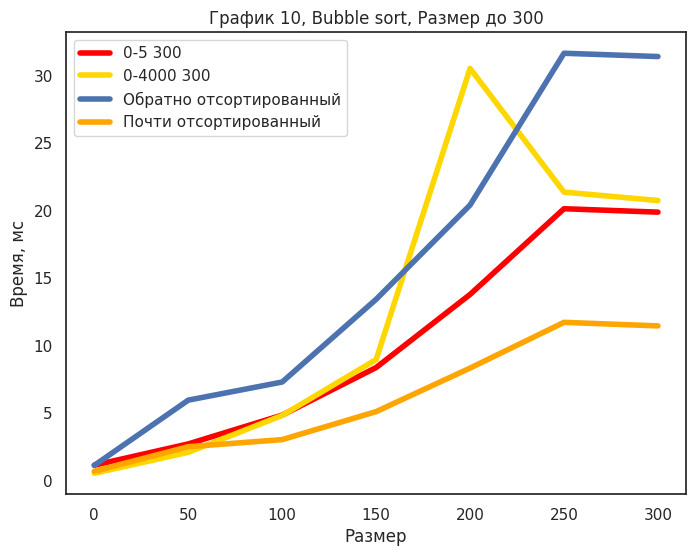

In [66]:
plt.plot(size_arr_1, bubble_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, bubble_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, bubble_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, bubble_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 10, Bubble sort, Размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

См. График 9

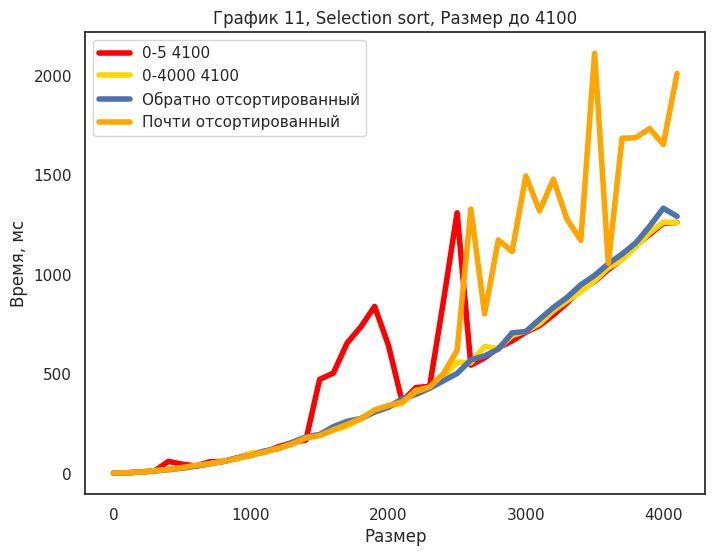

In [49]:
plt.plot(size_arr_2, selection_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, selection_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, selection_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, selection_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 11, Selection sort, Размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

На всех данных показывает себя одинково (n^2...)

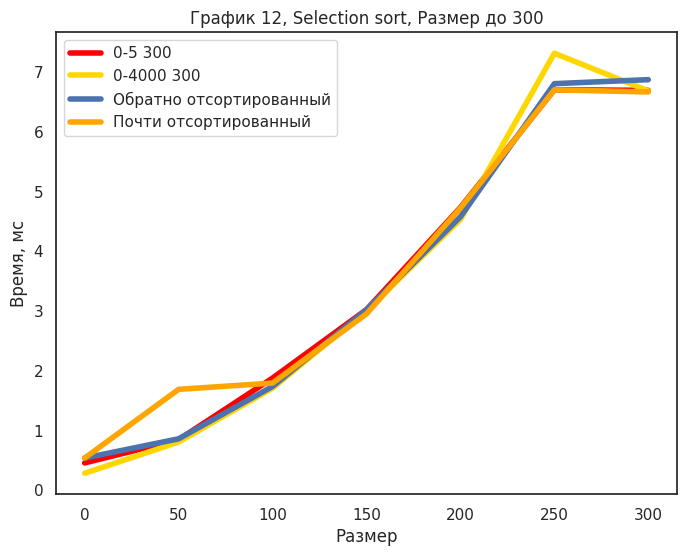

In [50]:
plt.plot(size_arr_1, selection_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, selection_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, selection_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, selection_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 12, Selection sort, Размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

См. График 11

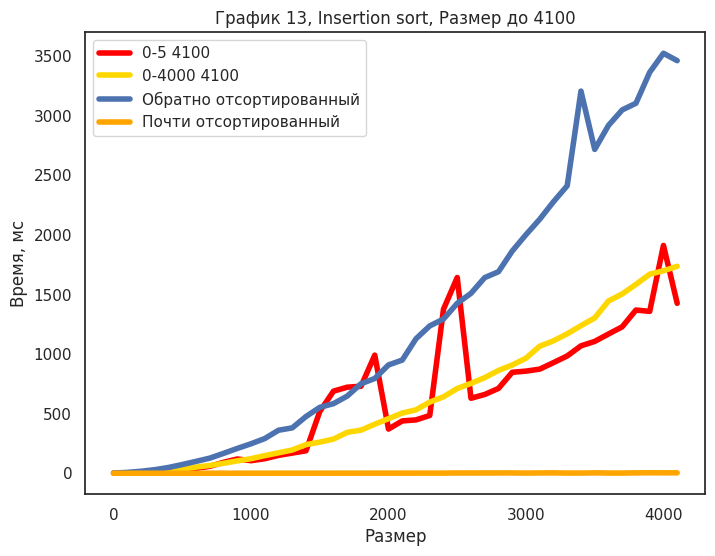

In [51]:
plt.plot(size_arr_2, insertion_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, insertion_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, insertion_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, insertion_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 13, Insertion sort, Размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Isertion sort работает идеально на почти отсортированных данных: См. график 7 В случае если массив обратно отсортирован асимптотика - n^2 так как ей нужно доходить до last - i на каждой итерации что есть n * n! асимп = n^2

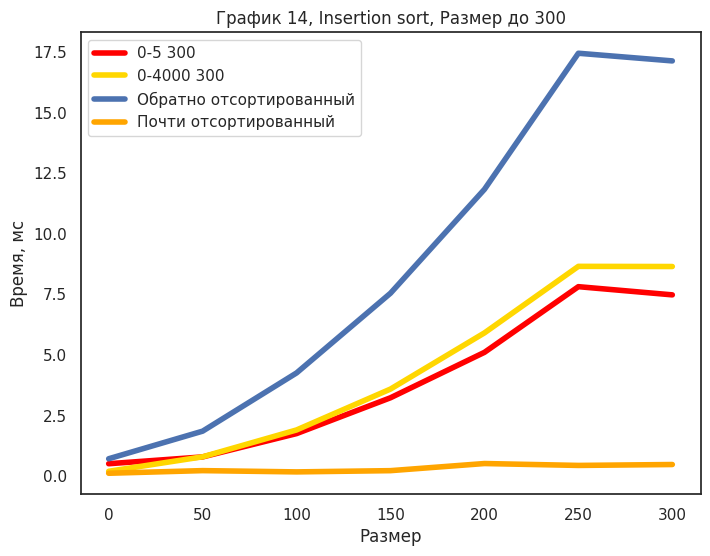

In [52]:
plt.plot(size_arr_1, insertion_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, insertion_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, insertion_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, insertion_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 14, Insertion sort, Размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

См. график 13

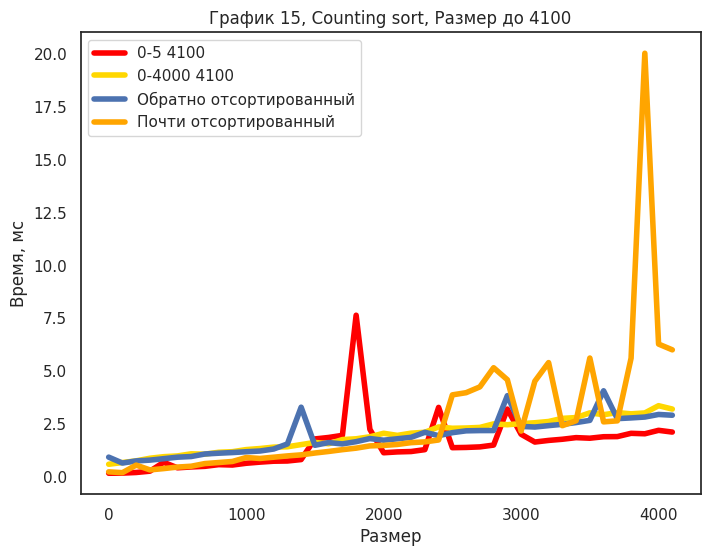

In [53]:
plt.plot(size_arr_2, counting_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, counting_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, counting_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, counting_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 15, Counting sort, Размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

При данных когда n и k примерно равны на всех данных counting sort показывает себя примерно одинаково.

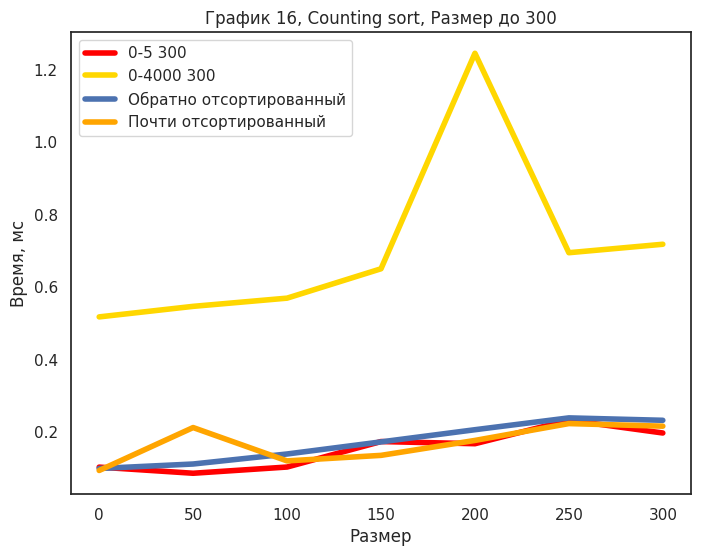

In [54]:
plt.plot(size_arr_1, counting_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, counting_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, counting_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, counting_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 16, Counting sort, Размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Counting sort: когда массив мал, но числа могут встречаться большие, показывает большую затрату по времени, логично так как k по сравнению с n большое (См. график 1)

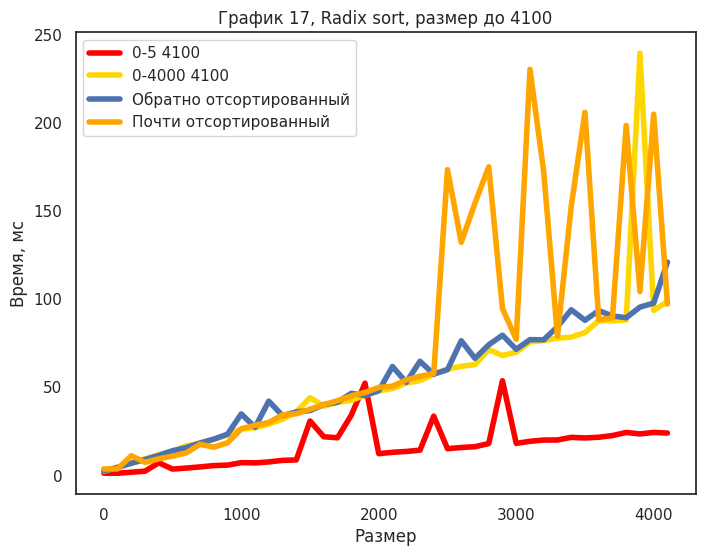

In [55]:
plt.plot(size_arr_2, radix_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, radix_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, radix_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, radix_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 17, Radix sort, размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Вывод под графиком 18.

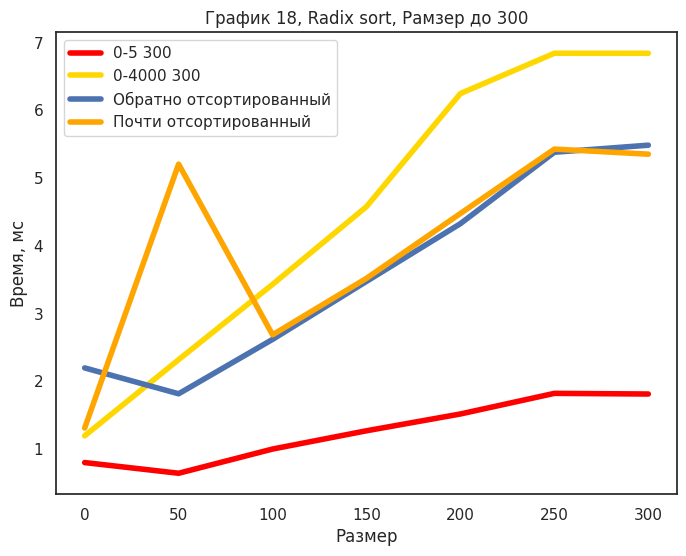

In [56]:
plt.plot(size_arr_1, radix_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, radix_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, radix_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, radix_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 18, Radix sort, Рамзер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Radix sort ведёт себя довольно предсказуемо: красный график гораздо быстрее, так как в массиве только цифры => асимптотика будет стремится к линейной. Противоположность этому - жёлтый где количество разрядов увеличелось в разы и цифры могут встречаться все. Различие в длинне массива тоже играет свою роль.

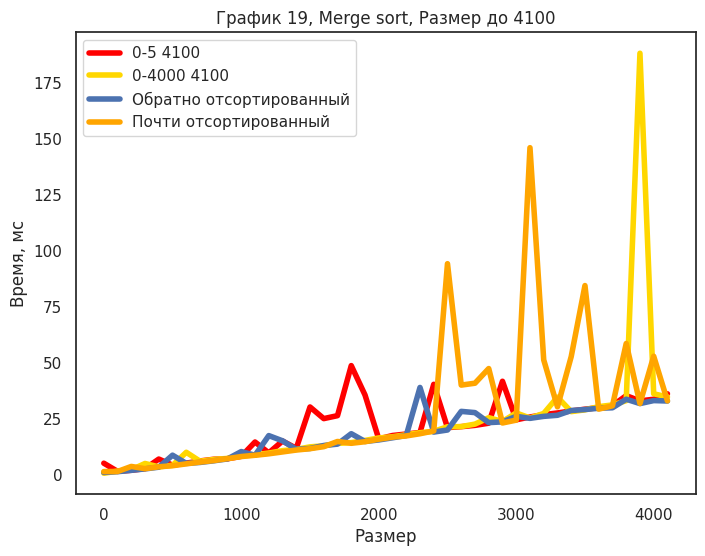

In [57]:
plt.plot(size_arr_2, merge_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, merge_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, merge_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, merge_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 19, Merge sort, Размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Распредление чисел примерно одинаковое, на больших данных merge sort будет работать в среднем за одно и тоже время

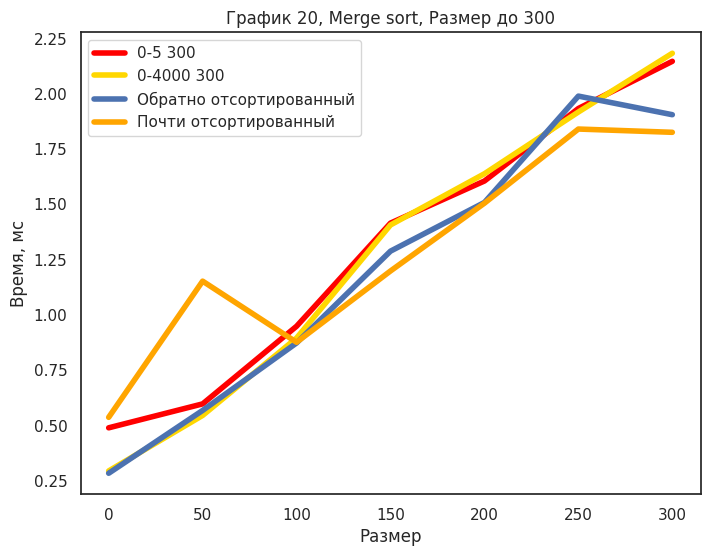

In [58]:
plt.plot(size_arr_1, merge_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, merge_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, merge_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, merge_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 20, Merge sort, Размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

можно заметить что у merge sort на 50 и на 200 - резские скачки по времени, в то время как y heap сорт наоброт, в этих позициях время небольшое. Связано это с небольшим количеством размера массива

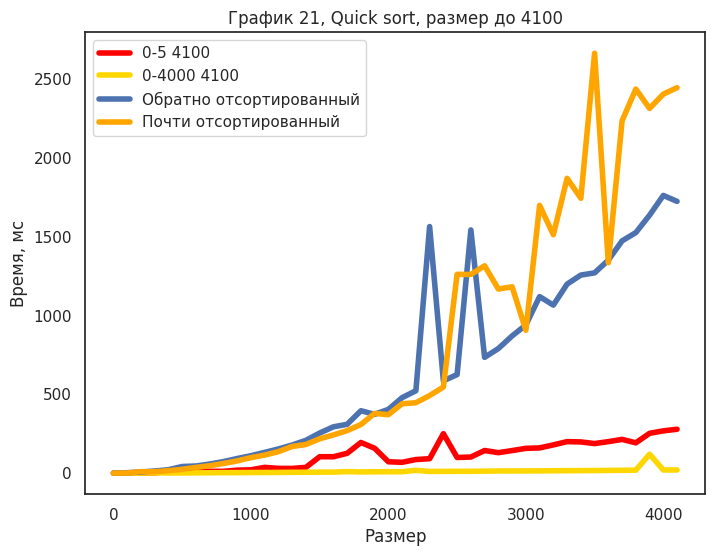

In [59]:
plt.plot(size_arr_2, quick_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, quick_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, quick_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, quick_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 21, Quick sort, размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Жёлтый график: Вероятность выбрать плохой опорный очень мала, так как большое количество разных чисел.
Красный график: Не самый плохой но и не самый лучший случай для qsort: Ведь тут вероятность выбрать плохой опорный(0 или 5) велика, так как всего 5 чисел.
Синий: худший случай - всегда плохой опорный
Оранжевый: с увеличением количества элементов выбирает не самый лучший, он и не самый худший опорный

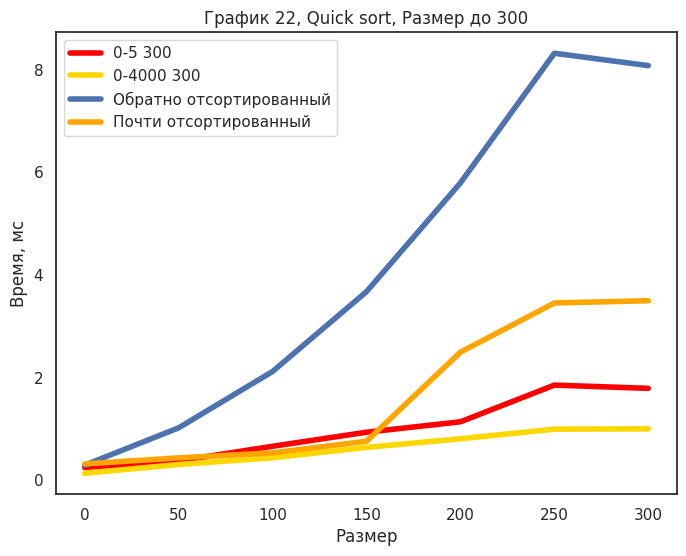

In [60]:
plt.plot(size_arr_1, quick_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, quick_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, quick_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, quick_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 22, Quick sort, Размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Практически всё тоже самое что и на графике 21, за исключением того что так как чисел гораздо меньше значит на оранжевом графике: выбирает не самый плохой опорный. Скачок красного графка скорее всего связан с выбором плохого опорного (вероятность не мала, но в предыдущем графике этого не произошло)

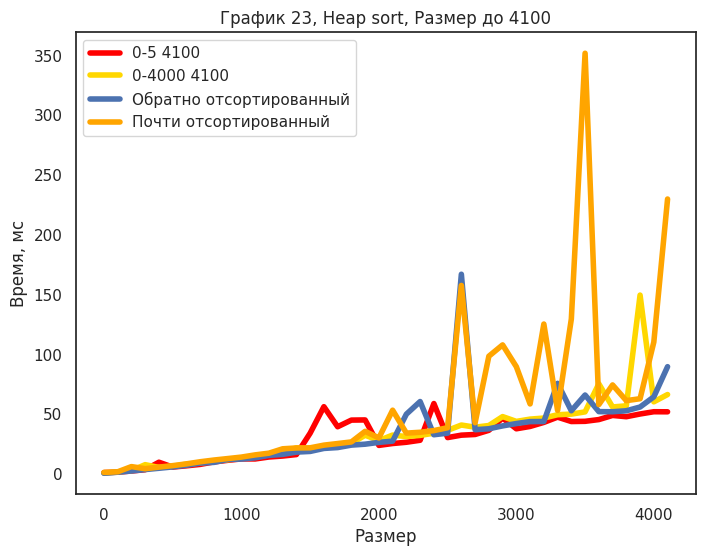

In [61]:
plt.plot(size_arr_2, heap_4100_0_5, c='red', label='0-5 4100', lw = 4)
plt.plot(size_arr_2, heap_4100_0_4000, c='gold', label='0-4000 4100', lw = 4)
plt.plot(size_arr_2, heap_4100_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_2, heap_4100_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 23, Heap sort, Размер до 4100')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

Как видно heap sort работает на всех данных примерно одинаково.

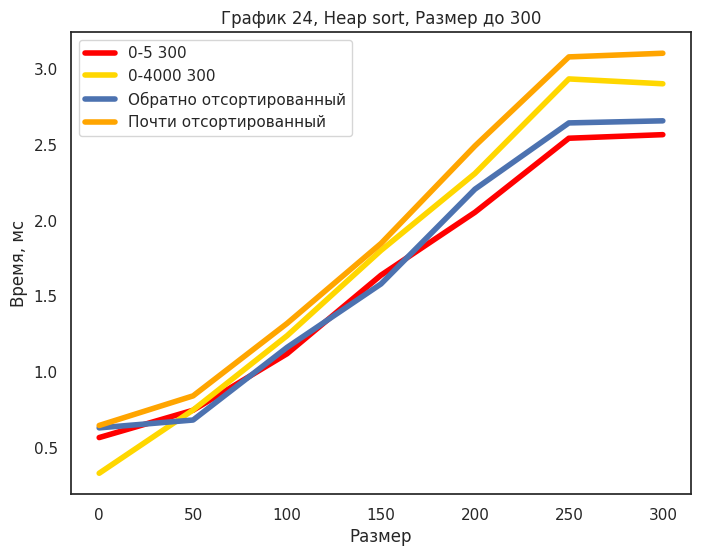

In [62]:
plt.plot(size_arr_1, heap_300_0_5, c='red', label='0-5 300', lw = 4)
plt.plot(size_arr_1, heap_300_0_4000, c='gold', label='0-4000 300', lw = 4)
plt.plot(size_arr_1, heap_300_reversed, c='b', label='Обратно отсортированный', lw = 4)
plt.plot(size_arr_1, heap_300_almostSorted, c='orange', label='Почти отсортированный', lw = 4)

plt.legend()
plt.title('График 24, Heap sort, Размер до 300')
plt.ylabel('Время, мс')
plt.xlabel('Размер')
plt.show()

## Представим наши данные в виде датасета

In [63]:
data_f

,Размер массива,bubble_300_0_5,selection_300_0_5,insertion_300_0_5,counting_300_0_5,radix_300_0_5,merge_300_0_5,quick_300_0_5,heap_300_0_5,bubble_300_0_4000,...,merge_300_reversed,quick_300_reversed,bubble_300_almostSorted,selection_300_almostSorted,insertion_300_almostSorted,counting_300_almostSorted,radix_300_almostSorted,merge_300_almostSorted,quick_300_almostSorted,heap_300_almostSorted
0,0,1.143456,0.460148,0.515699,0.102997,0.799179,0.489235,0.247002,0.567913,0.548601,...,0.283718,0.290394,0.699282,0.541449,0.122786,0.093699,1.309633,0.536680,0.315189,0.647783
1,50,2.720356,0.848293,0.796318,0.086069,0.641346,0.597477,0.373840,0.748396,2.099752,...,0.567913,1.018047,2.513409,1.690626,0.231266,0.212193,5.204916,1.152754,0.432491,0.843287
2,100,4.856348,1.879215,1.758099,0.103235,0.998735,0.948668,0.658512,1.121283,4.831076,...,0.873089,2.116203,3.040552,1.795530,0.178814,0.120163,2.685070,0.876188,0.529528,1.321554
3,150,8.379936,3.024101,3.235817,0.173569,1.268387,1.415253,0.932693,1.639843,8.972645,...,1.288414,3.672361,5.115271,2.953291,0.229836,0.135422,3.519535,1.198769,0.756741,1.849174
4,200,13.796806,4.732609,5.108833,0.167608,1.516581,1.605749,1.135826,2.054930,30.541658,...,1.508713,5.792141,8.340836,4.722834,0.523567,0.176668,4.477024,1.505375,2.492905,2.492905
5,250,20.147562,6.702662,7.817507,0.232697,1.820803,1.933813,1.850843,2.543926,21.377087,...,1.989841,8.319378,11.728525,6.701231,0.445366,0.223160,5.427122,1.840830,3.452063,3.080845
6,300,19.894361,6.691933,7.479668,0.197172,1.811028,2.147198,1.787663,2.567530,20.755529,...,1.905680,8.078337,11.466742,6.665707,0.483036,0.216007,5.352020,1.826048,3.495693,3.104925


In [64]:
data_s

,Размер массива,bubble_4100_0_5,selection_4100_0_5,insertion_4100_0_5,counting_4100_0_5,radix_4100_0_5,merge_4100_0_5,quick_4100_0_5,heap_4100_0_5,bubble_4100_0_4000,...,merge_4100_reversed,quick_4100_reversed,bubble_4100_almostSorted,selection_4100_almostSorted,insertion_4100_almostSorted,counting_4100_almostSorted,radix_4100_almostSorted,merge_4100_almostSorted,quick_4100_almostSorted,heap_4100_almostSorted
0,0,4.257441,1.859665,1.590729,0.159264,1.295567,5.049467,0.622511,1.282692,2.570152,...,0.943661,1.044512,2.674103,1.957417,0.523329,0.225544,3.680229,1.305819,1.077890,1.460075
1,100,11.124372,3.130913,3.184080,0.166178,1.250744,1.406908,0.926018,1.620054,8.958340,...,1.259804,3.753424,9.041309,3.453732,0.269651,0.187397,3.740311,1.348972,2.030134,1.940489
2,200,19.097805,6.762028,7.379532,0.195503,1.843929,1.889706,1.892567,2.613306,20.096779,...,1.869678,8.152723,11.856318,7.278919,0.552654,0.544310,11.150360,3.604889,10.381222,6.293774
3,300,34.964085,12.358427,13.139963,0.257730,2.432108,2.620459,3.097057,3.696680,38.472414,...,2.514601,14.497995,43.538094,13.284206,0.360012,0.318050,7.463932,2.606630,9.988785,4.536390
4,400,110.612869,60.527563,44.296265,0.677109,7.204056,6.905079,10.988474,9.953499,62.163591,...,3.276348,22.642851,33.265591,19.558668,0.404358,0.379801,9.458780,3.438473,16.744852,5.863428
5,500,161.748648,46.594381,32.620430,0.417233,3.611803,4.169941,6.569386,5.910397,82.923174,...,8.636236,42.999506,47.101259,29.385805,0.472307,0.451326,10.939360,3.924608,24.807930,7.087946
6,600,106.273174,37.193060,41.930914,0.457525,4.199266,5.073071,8.363247,6.948709,117.400885,...,4.972935,46.066761,62.921524,40.389061,0.483751,0.491381,12.833834,4.759550,37.094116,8.581877
7,700,137.065172,58.678389,58.583021,0.487089,4.852772,6.058931,12.250185,8.142710,148.492575,...,5.393505,58.621168,81.085205,48.359871,0.526190,0.617981,17.722607,5.564213,47.681093,10.337830
8,800,172.979116,60.078382,92.072725,0.566721,5.599260,6.806135,12.389898,10.218859,199.803352,...,6.129742,74.030876,114.763975,60.840607,0.595331,0.666857,16.061544,6.230831,62.091351,11.774540
9,900,211.642504,77.296734,119.746447,0.548363,5.866051,7.025957,19.925594,11.543274,232.993841,...,6.968498,93.531847,126.089334,75.266838,0.630140,0.717163,18.524408,7.107496,78.343153,13.000727


In [65]:
data_f.to_csv('ans_300.csv', index = False)
data_s.to_csv('ans_4100.csv', index = False)

# Вывод


Логично использовать разные сортировки в зависимости от данных:

Bubble sort - В отсортированном массиве :)

Selection sort - не использовать...

Insertion sort - В почти отсортированном массиве

Counting sort - Отсортирует всё быстро, но расходует много памяти при больших диапазонах возможных чисел в массиве.

Redix sort - Будет меньше расходовать память в отличие от counting sort, но при больших числах так же будет проседать по скорости (большое количество разрядов в числе)

Quick sort - когда массив не полуотсортирован в обратном порядке (всегда плохой опорный). В других случая qsort на равне с Merge и Heap

Merge sort - когда нужна стабильность (про данные ничего не известно)

Heap sort - когда нужна стабильность (про данные ничего не известно)
